# United Kingdom Refugee Statistics Exploratory Data Analysis

# Reading, Exploring and Preparing Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('UK-stats-2021-22.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Year                            1552 non-null   int64 
 1   Country of origin               1552 non-null   object
 2   Refugees under UNHCR's mandate  1552 non-null   int64 
 3   Asylum-seekers                  1552 non-null   int64 
 4   Total_count                     1552 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 60.8+ KB


In [3]:
df = df.rename(columns = {"Refugees under UNHCR's mandate":'UNHCR-refugee'})

In [4]:
df.rename(columns={'Total_count': 'Total Count',"Refugees under UNHCR's mandate":"UNHCR-refugee " }, inplace=True)

df.head()

,Year,Country of origin,UNHCR-refugee,Asylum-seekers,Total Count
0,2012,Afghanistan,9845,1262,11107
1,2012,Albania,1139,696,1835
2,2012,Algeria,636,228,864
3,2012,Angola,1156,48,1204
4,2012,Egypt,204,150,354


In [5]:
pd.DataFrame(df.isnull().sum(), columns=['Missing Values'])

,Missing Values
Year,0
Country of origin,0
UNHCR-refugee,0
Asylum-seekers,0
Total Count,0


# Question 1 - Which countries has United Kingdom admitted the highest number of refugees?

In [6]:

top_unhcr_refugees = df.groupby('Country of origin' )['UNHCR-refugee'].sum().reset_index(name='UNHCR-refugees').sort_values(by='UNHCR-refugees', ascending=False).head(10)
top_unhcr_refugees.reset_index(drop=True)

,Country of origin,UNHCR-refugees
0,Ukraine,183871
1,Iran (Islamic Rep. of),178981
2,Eritrea,143453
3,Unknown,130706
4,Afghanistan,106639
5,Syrian Arab Rep.,89014
6,Sudan,86815
7,Pakistan,76452
8,Zimbabwe,70775
9,Somalia,67387


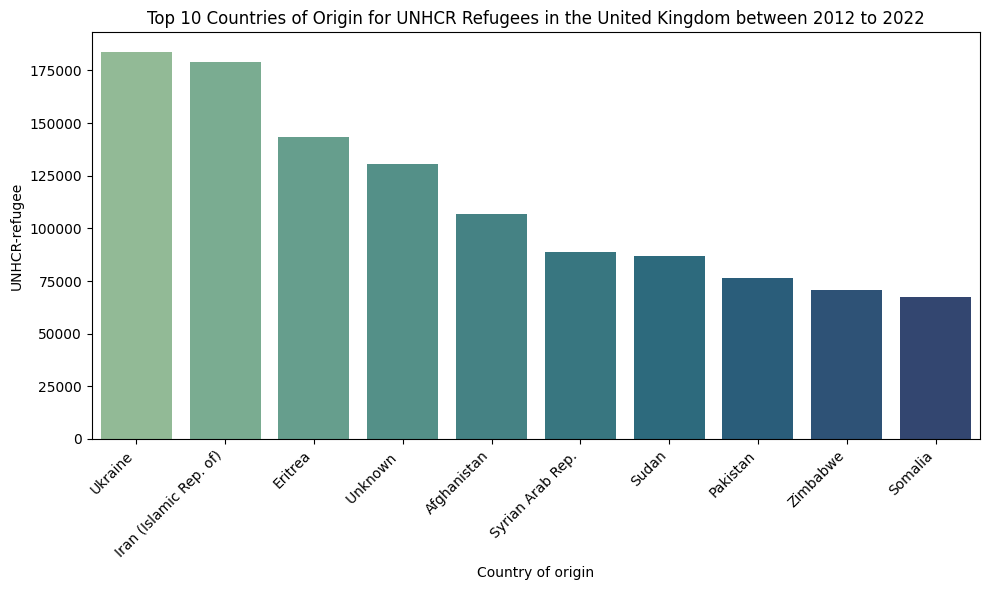

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_unhcr_refugees, x = 'Country of origin', y = 'UNHCR-refugees', palette="crest")

plt.xlabel('Country of origin')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('UNHCR-refugee')
plt.title('Top 10 Countries of Origin for UNHCR Refugees in the United Kingdom between 2012 to 2022')



plt.tight_layout()
plt.show()


# Question 2 - What are the total number of resettled refugees in United Kingdom per year?

In [8]:
total_refugees = df.groupby('Year')['UNHCR-refugee'].sum().reset_index(name='UNHCR-refugees').sort_values(by='Year')
total_refugees.reset_index(drop=True)

,Year,UNHCR-refugees
0,2012,149790
1,2013,126036
2,2014,117226
3,2015,123051
4,2016,118973
5,2017,121821
6,2018,126708
7,2019,133083
8,2020,132304
9,2021,137078


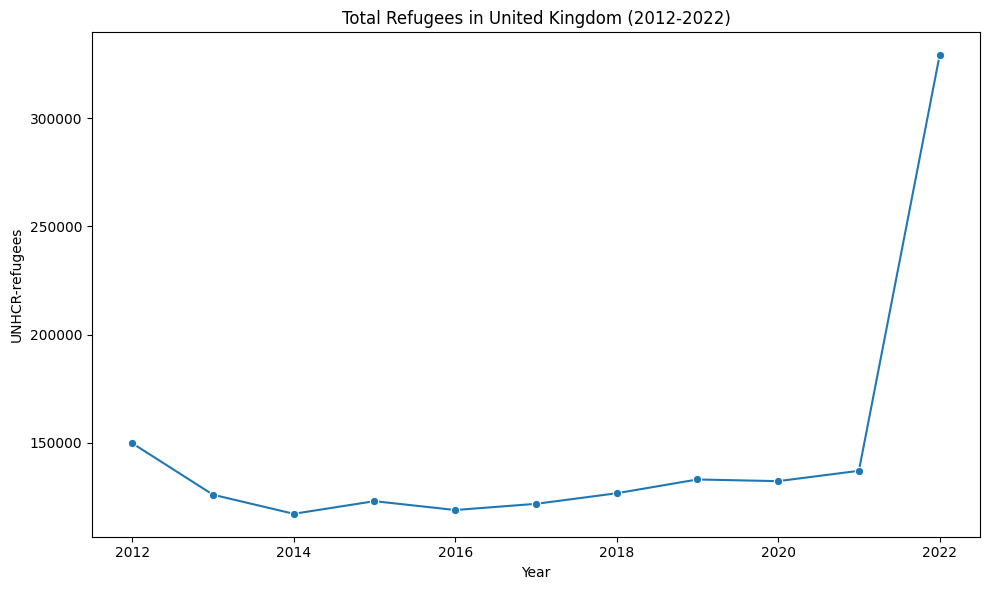

In [9]:
plt.figure(figsize=(10,6))
sns.lineplot(data=total_refugees, x = 'Year', y = 'UNHCR-refugees' , marker='o')

plt.xlabel('Year')
plt.ylabel('UNHCR-refugees')
plt.title('Total Refugees in United Kingdom (2012-2022)')


plt.tight_layout()
plt.show()

# Question 3 - Countries of Origin for Majority of Asylum Claims in the United Kingdom 


In [10]:
Asylum_seekers = df.groupby('Country of origin' )['Asylum-seekers'].sum().reset_index(name='Asylum-seekers').sort_values(by='Asylum-seekers', ascending=False).head(10)
Asylum_seekers.reset_index(drop=True)

,Country of origin,Asylum-seekers
0,Albania,67683
1,Unknown,65191
2,Iran (Islamic Rep. of),61724
3,Iraq,52796
4,Pakistan,39656
5,Afghanistan,38816
6,Eritrea,28129
7,Bangladesh,22492
8,Syrian Arab Rep.,21902
9,Nigeria,21595


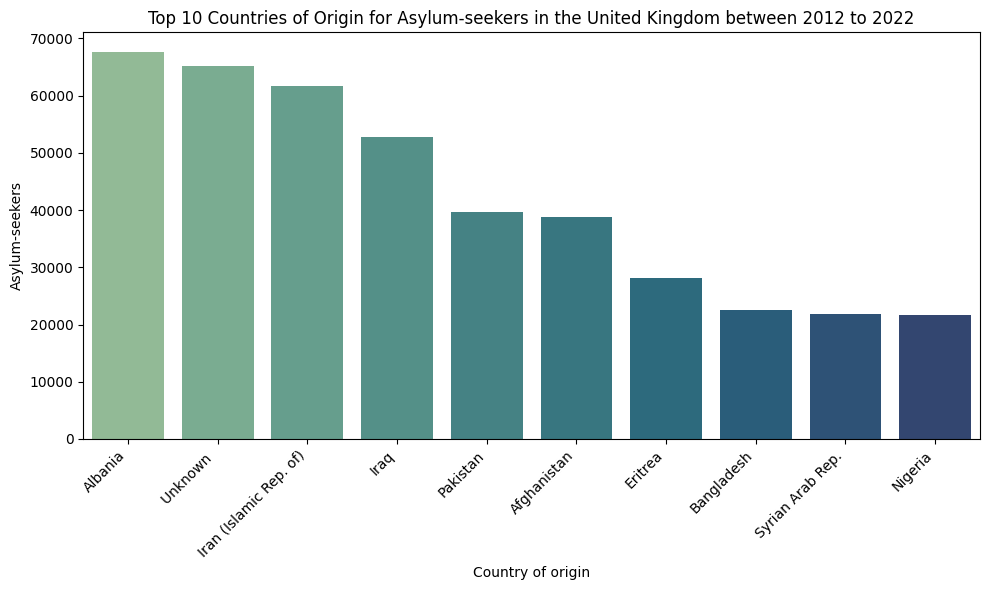

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(data=Asylum_seekers, x = 'Country of origin', y = 'Asylum-seekers', palette="crest")

plt.xlabel('Country of origin')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Asylum-seekers')
plt.title('Top 10 Countries of Origin for Asylum-seekers in the United Kingdom between 2012 to 2022')



plt.tight_layout()
plt.show()

# Question 4 -  Total Number of Asylum Claims Made in United Kingdom Every Year

In [12]:
total_Asylum_seekers = df.groupby('Year')['Asylum-seekers'].sum().reset_index(name='Asylum-seekers').sort_values(by='Year')
total_Asylum_seekers.reset_index(drop=True)

,Year,Asylum-seekers
0,2012,18896
1,2013,25100
2,2014,36354
3,2015,45853
4,2016,43496
5,2017,40354
6,2018,45234
7,2019,61947
8,2020,77245
9,2021,104897


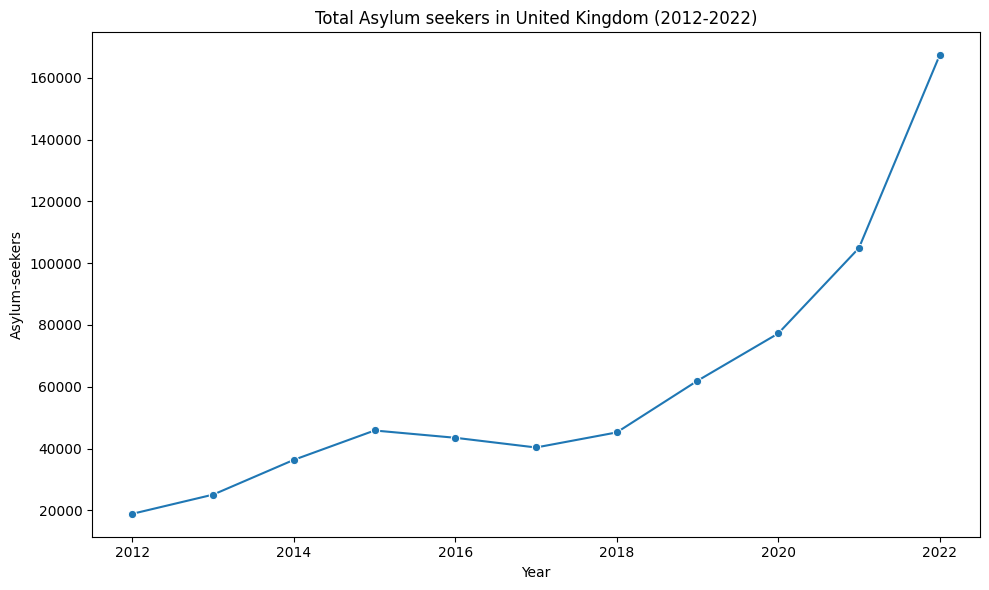

In [13]:
plt.figure(figsize=(10,6))
sns.lineplot(data=total_Asylum_seekers, x = 'Year', y = 'Asylum-seekers' , marker='o')

plt.xlabel('Year')
plt.ylabel('Asylum-seekers')
plt.title('Total Asylum seekers in United Kingdom (2012-2022)')


plt.tight_layout()
plt.show()

# Question 5 -  General Trends in Refugee and Asylum Statistics from 2012-2022

In [14]:
tc = df.groupby('Country of origin' )['Total Count'].sum().reset_index(name='Total Count').sort_values(by='Total Count', ascending=False).head(10)
tc.reset_index(drop=True)

,Country of origin,Total Count
0,Iran (Islamic Rep. of),240705
1,Unknown,195897
2,Ukraine,186431
3,Eritrea,171582
4,Afghanistan,145455
5,Pakistan,116108
6,Syrian Arab Rep.,110916
7,Iraq,107983
8,Sudan,106641
9,Albania,96202


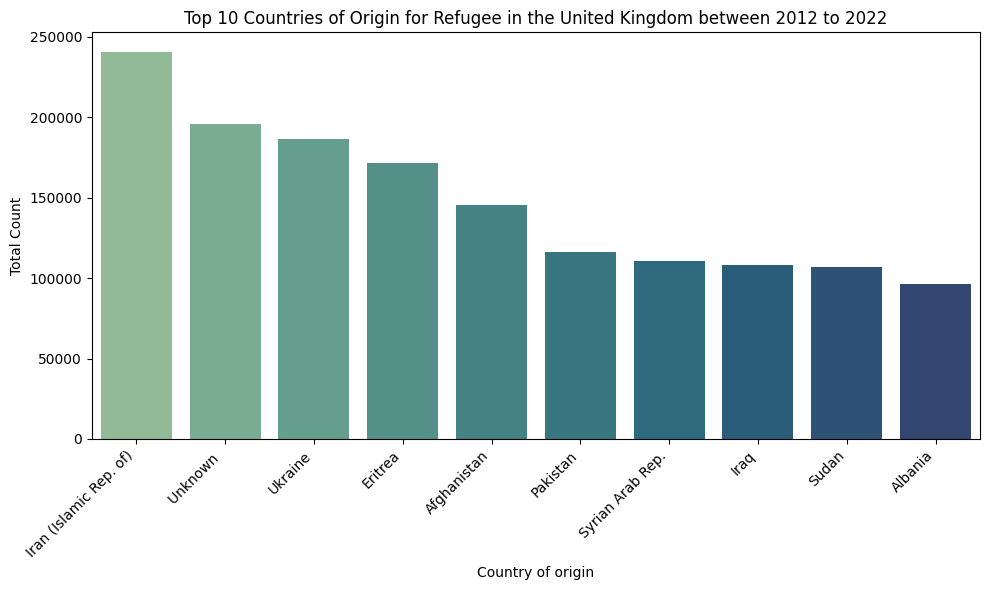

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(data=tc, x = 'Country of origin', y = 'Total Count', palette="crest")

plt.xlabel('Country of origin')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Total Count')
plt.title('Top 10 Countries of Origin for Refugee in the United Kingdom between 2012 to 2022')



plt.tight_layout()
plt.show()

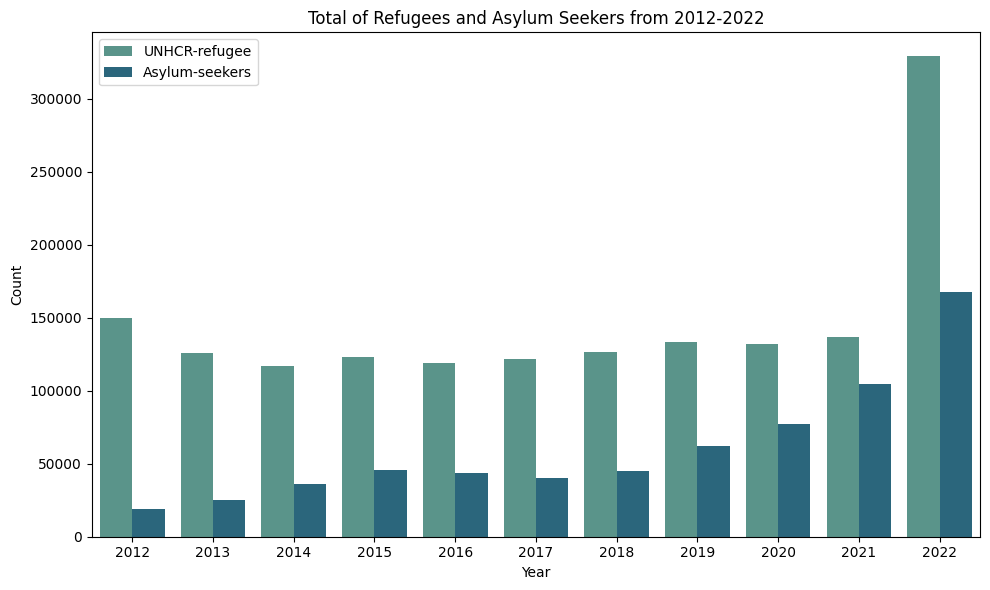

In [16]:
yc = df.groupby('Year')[['UNHCR-refugee', 'Asylum-seekers']].sum().reset_index()
melted_data = pd.melt(yc, id_vars=['Year'], var_name='Category', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='Year', y='Count', hue='Category', palette='crest')


plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Total of Refugees and Asylum Seekers from 2012-2022')


plt.legend()


plt.tight_layout()
plt.show()